In [27]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs), xs, ys, zs

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
arrow_prop_dict = dict(mutation_scale=100, arrowstyle='-|>', color='red', shrinkA=8, shrinkB=8)
a = Arrow3D([0, 1], [0, 1], [0, 1], **arrow_prop_dict)
ax.add_artist(a)
    
plt.show()

In [24]:
a

TypeError: contains() missing 1 required positional argument: 'mouseevent'

In [ ]:
# function to specifically calculate the eigenvector of a PCA of the orientated artefact
def calc_striking_vector (self):

    pca = PCA(n_components=3)

    principalComponents = pca.fit_transform(self.point_cloud[:,:3])

    self.striking_direction_vector = pca.components_

def depict_striking_vector (self): 
    
    mean_point = np.array([[np.mean(self.point_cloud[:,0]),np.mean(self.point_cloud[:,1]),np.mean(self.point_cloud[:,2])]])

    striking_direction =  np.vstack ([arrow_origin - np.array ([[45,0,0]]).dot(self.striking_direction_vector), arrow_origin + np.array ([[45,0,0]]).dot(self.striking_direction_vector) ])

In [2]:
from mesh import Mesh
from gaussian_map import Gaussian_Map

import numpy as np
import matplotlib.pyplot as plt


In [7]:
path = '/media/linsel/3931-6632/data/phd stone tools/Blades_Bladelets_PLY/annotated/coloured/selected_old/'

name = '695.comp.2'#"31.comp.1"
#from gaussian_map_3 import Gaussian_Map
filename = path


In [8]:
GM_1 = Gaussian_Map()
GM_1.load_ply(filename, name + '.ply')


Time read data file: 1.2033316160013783
Time read and prepare data: 7.278907785002957


In [9]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

principalComponents = pca.fit_transform(GM_1.point_cloud[:,:3])

data_transformed = principalComponents

mean_point = np.array([[np.mean(GM_1.point_cloud[:,0]),np.mean(GM_1.point_cloud[:,1]),np.mean(GM_1.point_cloud[:,2])]])

striking_direction =  np.vstack ([arrow_origin - np.array ([[45,0,0]]).dot(pca.components_), arrow_origin + np.array ([[45,0,0]]).dot(pca.components_) ])

AttributeError: 'Gaussian_Map' object has no attribute 'point_cloud'

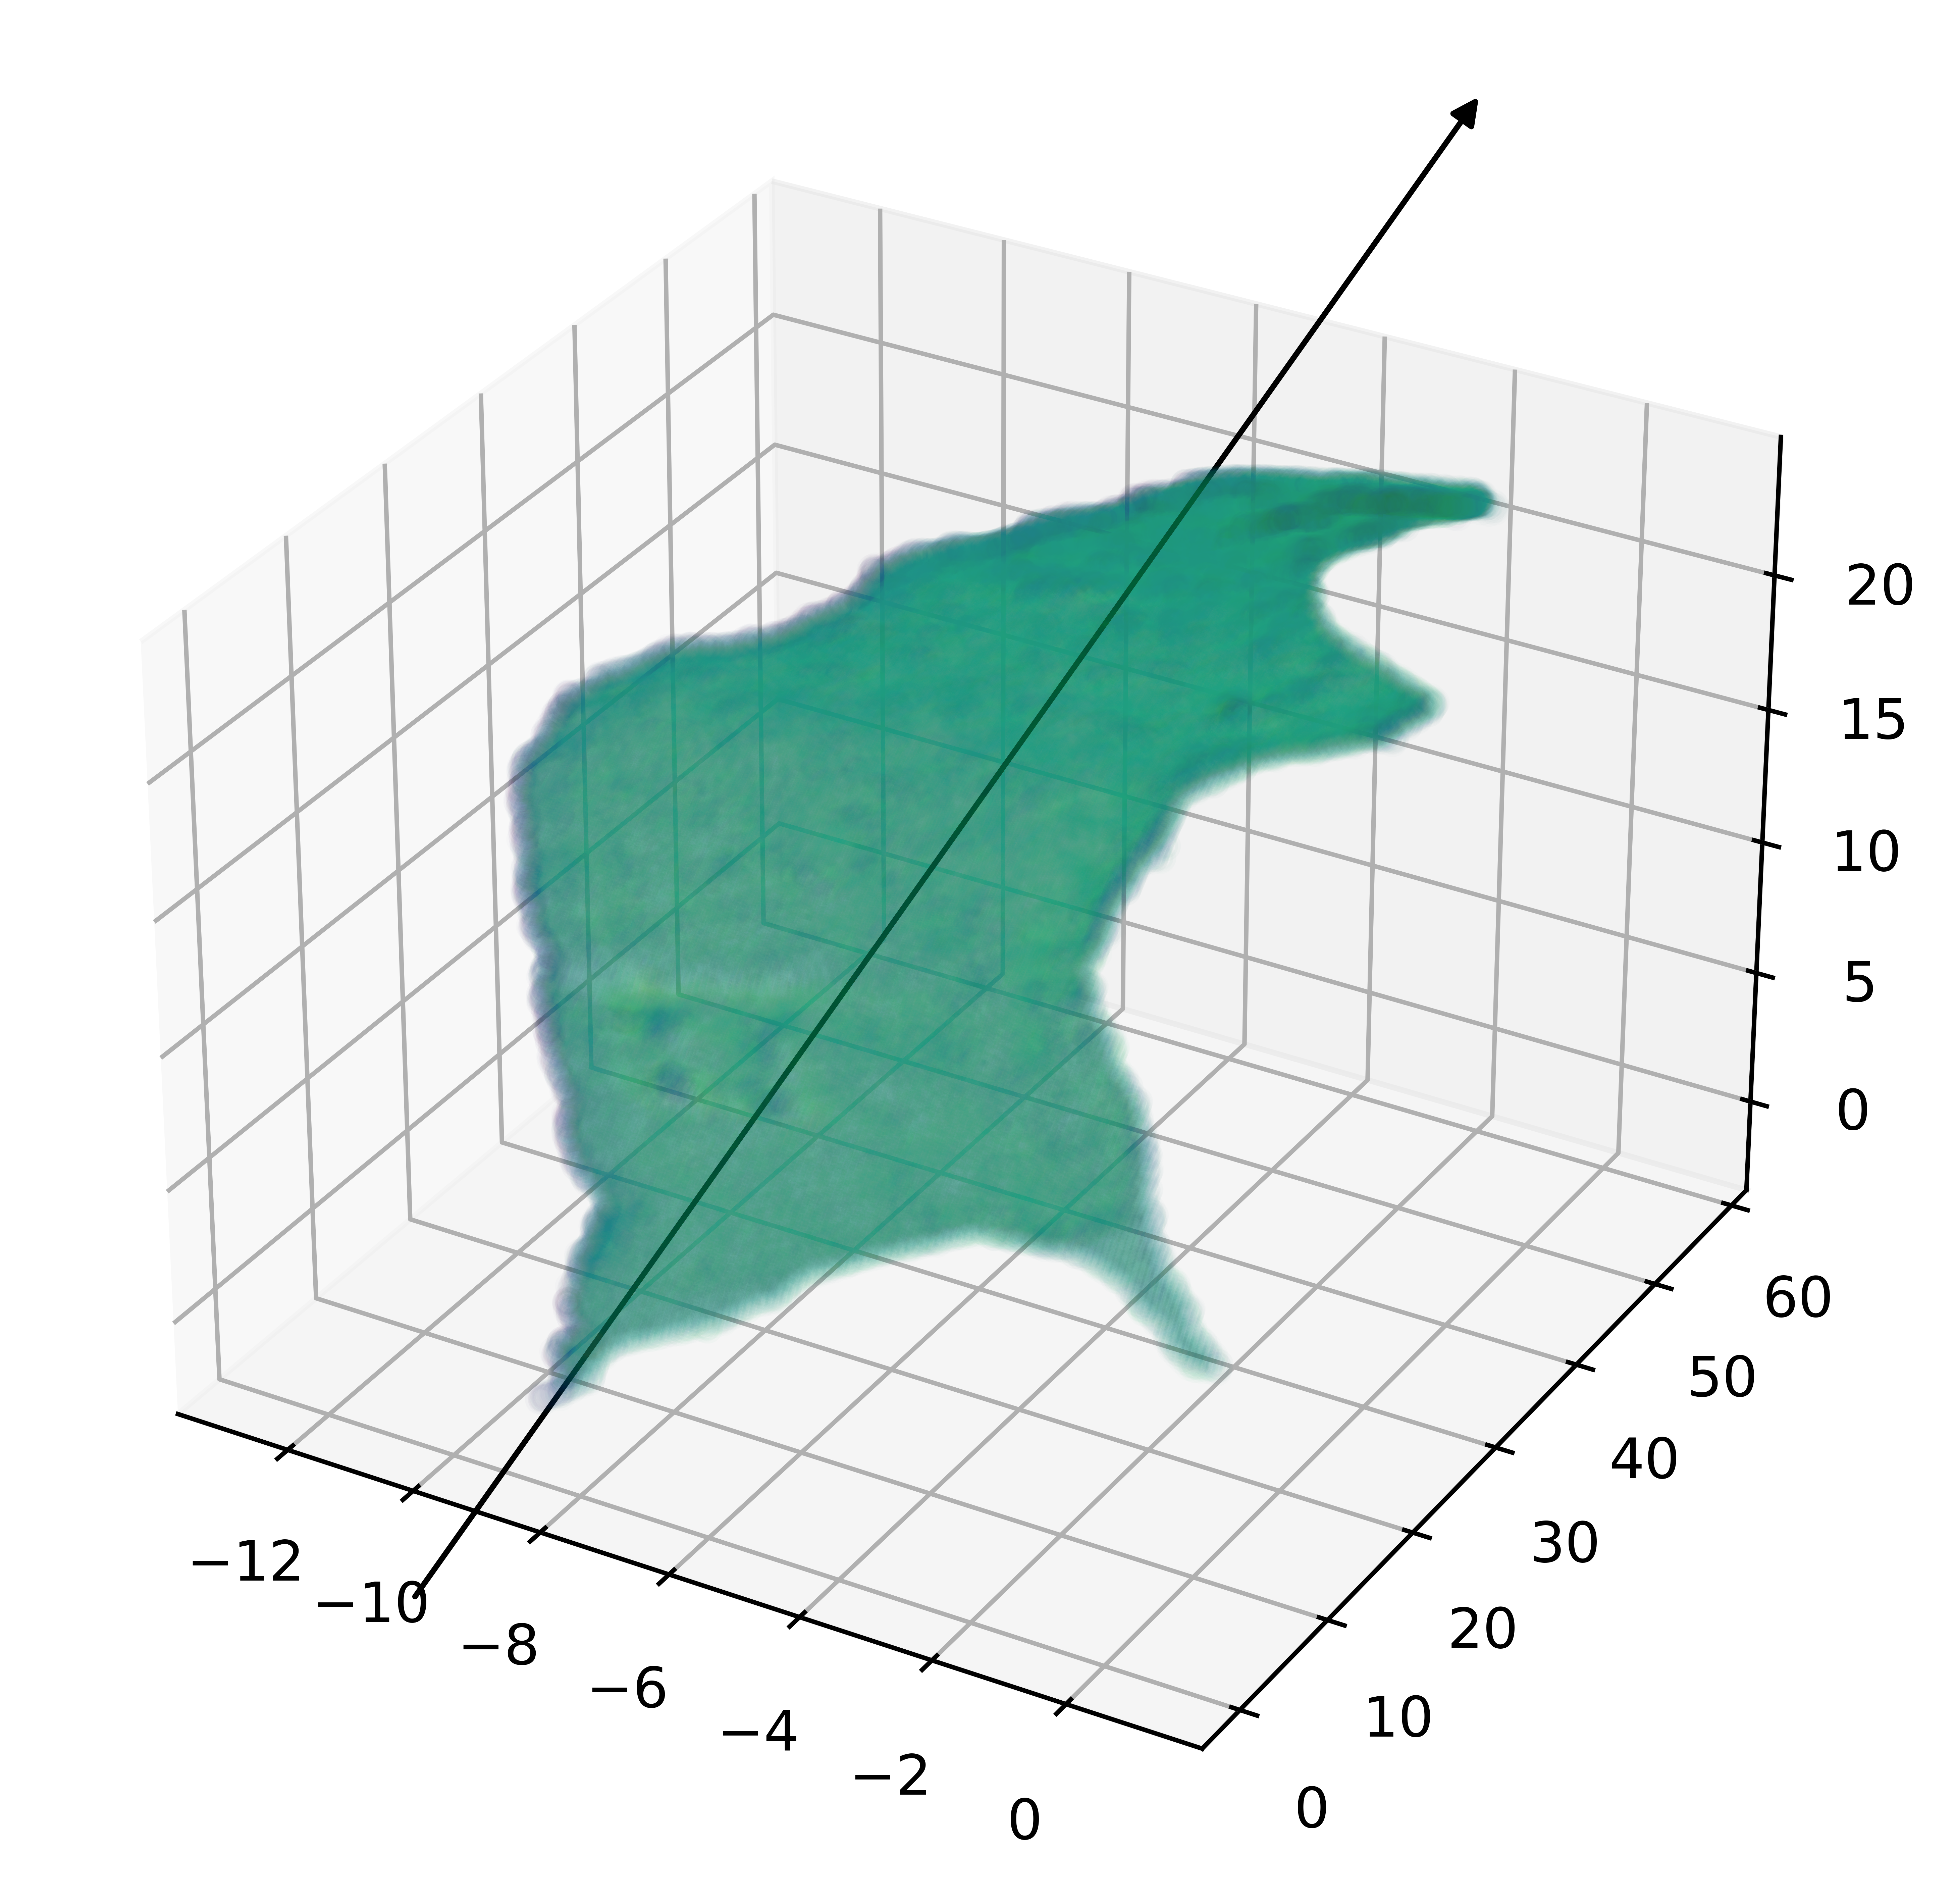

In [33]:
fig = plt.figure(figsize=(8, 6), dpi=1200)
# fig(figsize=(8, 6), dpi=1200)
ax = fig.add_subplot(111, projection='3d')
arrow_prop_dict = dict(mutation_scale=10, arrowstyle='-|>', color='k', shrinkA=0, shrinkB=0)
a = Arrow3D([striking_direction[0,0], striking_direction[1,0]], [striking_direction[0,1], striking_direction[1,1]], [striking_direction[0,2], striking_direction[1,2]], **arrow_prop_dict)
ax.add_artist(a)
ax.scatter(GM_1.point_cloud[:,0], GM_1.point_cloud[:,1], GM_1.point_cloud[:,2],c = GM_1.point_cloud[:,3], alpha=0.01)
plt.show()